In [33]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport


# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

In [34]:
df_train=pd.read_csv('train (2).csv')
df_test=pd.read_csv('test.csv')
df = pd.concat([df_train, df_test])

In [35]:
df.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock', nan], dtype=object)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [37]:
profile = ProfileReport(df_train, title='Pandas Profiling Report_2', explorative=True)

In [38]:
profile.to_file("your_report.html")

Summarize dataset:  91%|█████████▏| 86/94 [00:08<00:00, 29.14it/s, Calculate cramers correlation]C:\Users\Aldona\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:133: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


<AxesSubplot:>

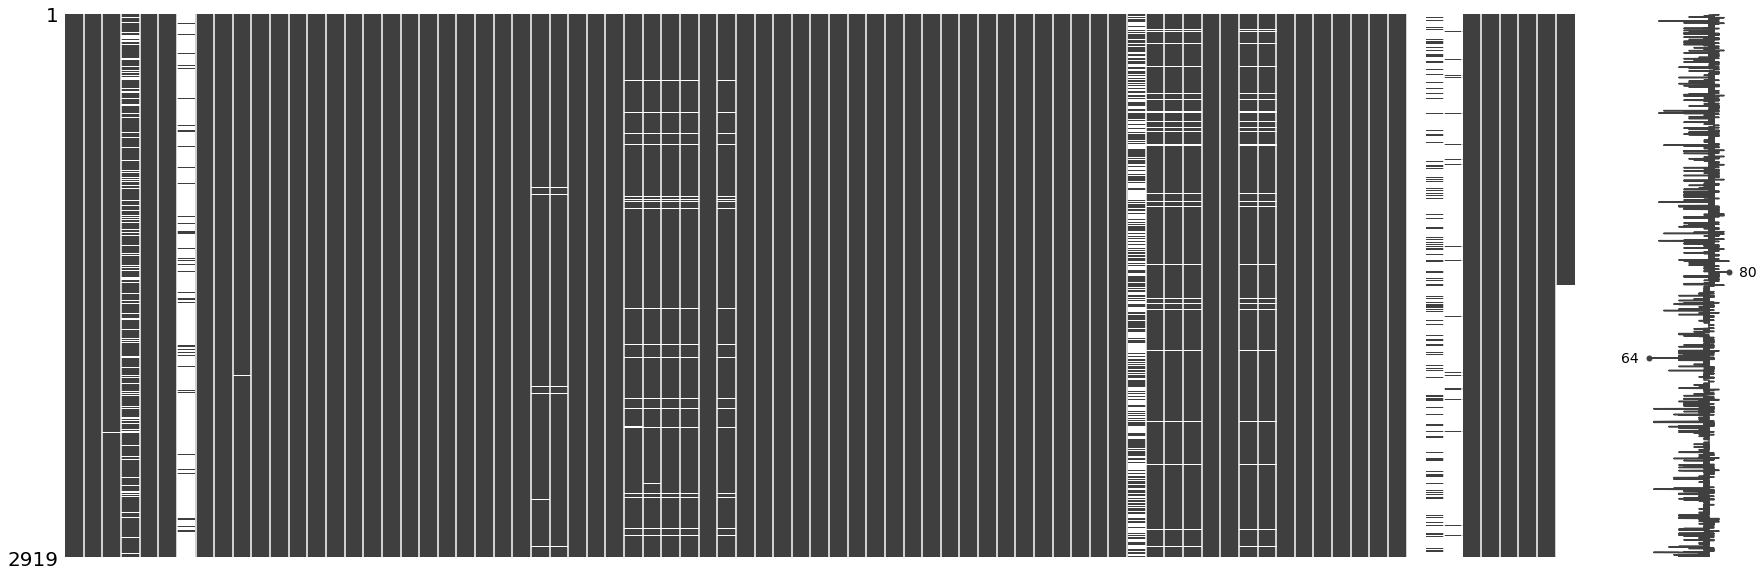

In [39]:

# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

In [40]:
corr = df.corr()
corr['SalePrice'].sort_values(ascending=False)[1:15].to_frame()\
.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


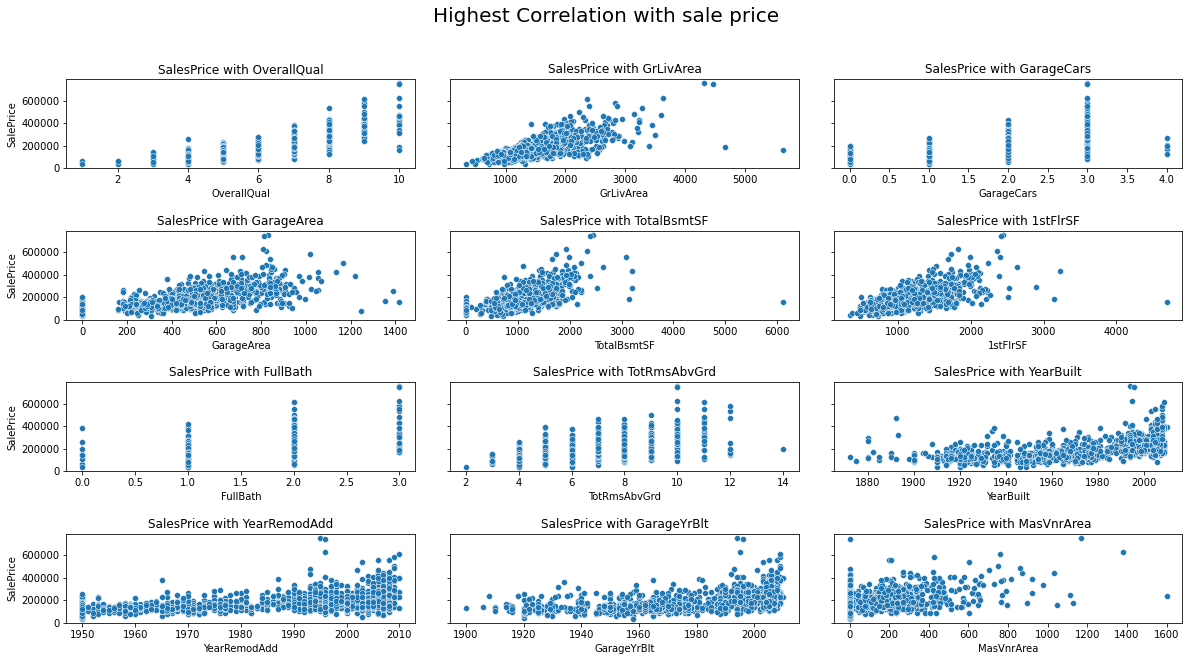

In [41]:
#Visualize columns have corr with SalePrice

high_corr = corr['SalePrice'].sort_values(ascending=False)[1:][:13].index.tolist()

fig, axes = plt.subplots(4,3, figsize=(20, 10), sharey=True);
plt.subplots_adjust(hspace = 0.7, wspace=0.1)
fig.suptitle('Highest Correlation with sale price', fontsize=20);

for i,col in zip(range(12),high_corr):
    sns.scatterplot(y=df['SalePrice'], x=df[col], ax=axes[i//3][i%3])
    axes[i//3][i%3].set_title('SalesPrice with '+col)

<AxesSubplot:xlabel='SalePrice'>

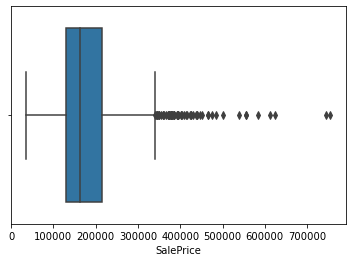

In [42]:
import seaborn as sns
sns.boxplot(x=df['SalePrice'])

In [43]:
df1=pd.DataFrame()

df1=df[['OverallQual', 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'SalePrice']]
df1.shape

(2919, 13)

In [44]:
brakujace_dane = df1.isnull().sum().sort_values()
brakujace_dane.tail(50)

OverallQual        0
GrLivArea          0
1stFlrSF           0
FullBath           0
TotRmsAbvGrd       0
YearBuilt          0
YearRemodAdd       0
GarageCars         1
GarageArea         1
TotalBsmtSF        1
MasVnrArea        23
GarageYrBlt      159
SalePrice       1459
dtype: int64

In [45]:
df2=pd.DataFrame()
df2=df1.dropna(axis=0, how='any')

In [46]:
brakujace_dane = df2.isnull().sum().sort_values()
brakujace_dane.tail(50)

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
SalePrice       0
dtype: int64

In [47]:
profile = ProfileReport(df1, title='Pandas Profiling Report_3', explorative=True)

In [48]:
profile.to_file("your_report_2.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 32.24it/s]


In [49]:
df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [50]:
high_corr

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces']

In [51]:
#Outliers detection
from scipy import stats

z = np.abs(stats.zscore(df2))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze')
print("\n")
print(np.where(z > 3))

[[0.6096228  0.34028752 0.20695951 ... 0.99780851 0.4716164  0.29575152]
 [0.1346273  0.52270508 0.20695951 ... 0.09619888 0.59084009 0.04669867]
 [0.6096228  0.48668805 0.20695951 ... 0.91677093 0.28731272 0.48600163]
 ...
 [0.6096228  1.55387086 1.37818849 ... 1.51435662 0.59084009 1.03138526]
 [0.8788774  0.87714848 1.37818849 ... 1.14968749 0.59084009 0.5461052 ]
 [0.8788774  0.53426302 1.37818849 ... 0.5419056  0.59084009 0.47793225]]


*******************************************************************************


Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze


(array([  56,   56,   68,   88,   99,  108,  111,  149,  164,  164,  164,
        171,  171,  171,  183,  208,  208,  208,  276,  283,  283,  310,
        327,  327,  365,  395,  413,  413,  413,  444,  448,  466,  466,
        466,  466,  487,  492,  492,  492,  492,  496,  545,  554,  571,
        590,  619,  619,  646,  646,  646,  646,  646,  699,  699,  706,
        71

In [52]:
df_outliers_removed = df2[(z<3).all(axis=1)]

In [53]:
df_outliers_removed.info

<bound method DataFrame.info of       OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               7       1710         2.0       548.0        856.0       856   
1               6       1262         2.0       460.0       1262.0      1262   
2               7       1786         2.0       608.0        920.0       920   
3               7       1717         3.0       642.0        756.0       961   
4               8       2198         3.0       836.0       1145.0      1145   
...           ...        ...         ...         ...          ...       ...   
1455            6       1647         2.0       460.0        953.0       953   
1456            6       2073         2.0       500.0       1542.0      2073   
1457            7       2340         1.0       252.0       1152.0      1188   
1458            5       1078         1.0       240.0       1078.0      1078   
1459            5       1256         1.0       276.0       1256.0      1256   

      FullBath  Tot

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1371 non-null   int64  
 1   GrLivArea     1371 non-null   int64  
 2   GarageCars    1371 non-null   float64
 3   GarageArea    1371 non-null   float64
 4   TotalBsmtSF   1371 non-null   float64
 5   1stFlrSF      1371 non-null   int64  
 6   FullBath      1371 non-null   int64  
 7   TotRmsAbvGrd  1371 non-null   int64  
 8   YearBuilt     1371 non-null   int64  
 9   YearRemodAdd  1371 non-null   int64  
 10  GarageYrBlt   1371 non-null   float64
 11  MasVnrArea    1371 non-null   float64
 12  SalePrice     1371 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 150.0 KB


In [55]:
# Split the dataframe into data and labels
X_train = df_outliers_removed.drop('SalePrice', axis=1) # data
y_train = df_outliers_removed.SalePrice # labels

In [56]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [57]:
# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

In [58]:
# Logistic Regression

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
Accuracy: 8.97
Accuracy CV 10-Fold: 0.84


In [59]:

# k-Nearest Neighbours

train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)

print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)


Accuracy: 21.38
Accuracy CV 10-Fold: 0.84
C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [60]:
# Gaussian Naive Bayes

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)

print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)


Accuracy: 44.98
Accuracy CV 10-Fold: 0.61
C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [61]:
# Linear SVC

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)

print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)


C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
Accuracy: 0.84
Accuracy CV 10-Fold: 0.0


In [62]:

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)

print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)


C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
Accuracy: 1.07
Accuracy CV 10-Fold: 0.31


In [63]:
# Decision Tree Classifier

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)

print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)


C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
Accuracy: 99.23
Accuracy CV 10-Fold: 0.69


In [64]:
# # Gradient Boosting Treesstart_time = time.time()
# train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
#                                                                        X_train, 
#                                                                        y_train,
#                                                                        10)

# print("Accuracy: %s" % acc_gbt)
# print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)


In [65]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              ],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
       
        
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

ValueError: arrays must all be same length

In [ ]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              ],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)